# COGS 108 - Final Project 

# How High Is the U.S.?

# Overview

As marijuana becomes legalized and viewed as a norm in U.S. culture, we want to explore marijuana usage as it relates to people's living conditions. In exploring the relationship between marijuana usage and important factors like age, education levels, and socioeconomic status, we can gain a better understanding of who is prone or susceptible to using based on their living conditions as it could affect their overall living experiences.

# Names

- Gregory Thein
- Queen Tran
- Shiva Upadhye
- Diana Thai
- Osvaldo Vazquez
- Sophie Concordel 

# Group Members IDs

- Gregory - A14369060
- Queen - FILL
- Shiva - A15693318
- Diana - A12855877
- Osvaldo - A14418440
- Sophie - FILL

# Research Question

We want to explore how various living conditions throughout the country is related to marijuana usage, making us prompt the question: 

“What is the relationship between marijuana usage, age, and socioeconomic status throughout the United States?”


## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


We believe that there would be three groups that would have increased marijuana usage from the various factors that we decide to study on. 

First, younger people (anyone younger than 26) will have a higher rate of marijuana usage because of the social popularity and culture behind this drug amongst the youth. 

Second, we predict that as the income and education level increase (higher socioeconomic status), there should be a negative relationship with drug use, meaning that the higher the income and education level, the lower the marijuana use. 

Finally, we also believe that there could be a high usage of medical marijuana in elderly and sick people as the popularity of medical marijuana increases throughout the country. 

# Dataset(s)

We decided to use two datasets for our analysis. After searching long and hard, we found the treasure that is the NHANES (National Health and Nutrition Examination Survey) had a lot of data, allowing us to collect a lot of information for a lot of people. There were multiple datasets from this page, organized by year and categories. We decided to use the 2015-2016 dataset since it was the most relevant completed dataset that was publically available. We decided to utilize the Demographics dataset since it contained most of our information about age and socioeconomic status and the Drug Usage dataset that allowed us to see the marijuana usage for the data. 


***TO DO***
- Dataset Name:
- Link to the dataset:
- Number of observations:

- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [55]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import patsy
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
demographics = pd.read_sas('data/DEMO_I.XPT')
demographics.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32
2,83734.0,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,...,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51
3,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00
4,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23


In [3]:
questionaire = pd.read_sas('data/DUQ_I.XPT')
questionaire.head()

,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,1.0,25.0,1.0,25.0,5.397605e-79,1.0,5.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,1.0,15.0,1.0,16.0,1.000000e+00,4.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
merged = pd.merge(demographics, questionaire, on = 'SEQN')
merged.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,9.0,2.0,1.0,22.0,NaN,4.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [5]:
cols = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'INDHHIN2', 
        'INDFMPIR', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DUQ200', 'DUQ210', 'DUQ217', 'DUQ211', 
        'DUQ213', 'DUQ215Q', 'DUQ219', 'DUQ220Q', 'DUQ230']
df = merged[cols]
df['CHILDREN_NUM'] = df['DMDHHSZA'] + df['DMDHHSZB']
df = df.drop(columns = ['DMDHHSZA', 'DMDHHSZB'])

In [6]:
lst_7 = ['DMDEDUC2', 'DUQ200', 'DUQ217', 'DUQ211', 'DUQ219']
lst_77 = ['DMDMARTL', 'DMDEDUC3', 'INDHHIN2']
lst_777 = ['DUQ210', 'DUQ213', 'DUQ230']

for i in lst_7:
    df[i] = df[i].replace({7: 7777, 9: 9999})
for i in lst_77:
    df[i] = df[i].replace({77: 7777, 99: 9999})
for i in lst_777:
    df[i] = df[i].replace({777: 7777, 999: 9999})

In [7]:
translation_dict = {'SEQN': 'ID', 'RIAGENDR': 'GENDER', 'RIDAGEYR': 'AGE', 'DMDMARTL': 'MARRIAGE', 
                    'RIDEXPRG': 'PREGNANCY', 'INDHHIN2': 'INCOME', 'INDFMPIR': 'INCOME_RATIO', 
                    'DMDHHSIZ': 'HOUSEHOLD_NUM', 'DMDHHSZE': 'OVER_60_NUM', 'DUQ200': 'EVER_USE', 
                    'DUQ210': 'FIRST_USAGE', 'DUQ217': 'FREQUENCY', 'DUQ211': 'PER_MONTH', 
                    'DUQ213': 'AGE_REGULAR_USE', 'DUQ215Q': 'LAST_ONCE_MONTH', 'DUQ219': 'AMOUNT', 'DUQ220Q': 'LAST_USAGE', 
                    'DUQ230': 'PAST_MONTH_USAGE', 'DMDEDUC2': 'EDUCATION_ADULT', 'DMDEDUC3': 'EDUCATION_KID'}
df = df.rename(index = str, columns = translation_dict)
df.head(10)

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,5.397605e-79,4.0,1.0,30.0,2.000000e+00
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.000000e+00,2.0,1.0,25.0,1.079521e-78
5,83742.0,2.0,32.0,NaN,4.0,1.0,2.0,6.0,1.03,4.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,13.0,NaN,2.000000e+00
6,83743.0,1.0,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
7,83744.0,1.0,56.0,NaN,3.0,3.0,NaN,3.0,1.19,1.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,20.0,NaN,1.079521e-78
8,83747.0,1.0,46.0,NaN,5.0,6.0,NaN,3.0,0.75,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
9,83750.0,1.0,45.0,NaN,2.0,5.0,NaN,10.0,1.36,5.0,...,1.0,21.0,NaN,2.0,NaN,NaN,NaN,20.0,1.0,2.000000e+00


In [8]:
#OVER_60_NUM
#LAST_ONCE_MONTH
#CHILDREN_NUM
df['OVER_60_NUM'] = df['OVER_60_NUM'].round(0)
df['LAST_ONCE_MONTH'] = df['LAST_ONCE_MONTH'].round(0)
df['CHILDREN_NUM'] = df['CHILDREN_NUM'].round(0)
df['INCOME_RATIO'] = df['INCOME_RATIO'].replace({5.397605e-79: 0}).round(2)

In [9]:
df.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,0.0,4.0,1.0,30.0,2.0
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0


In [10]:
#write dataframe to csv file
df.to_csv("cleaned_marijuana_data.csv")

# Data Analysis and Results

In [11]:
## TABLE DESCRIBING COLUMNS (TBD: Osvaldo)

In [12]:
df.describe(include='all')

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
count,4843.000000,4843.000000,4843.000000,261.000000,4582.000000,4582.000000,1240.000000,4675.000000,4377.000000,4843.000000,...,3428.000000,1715.000000,870.000000,1715.000000,870.000000,864.000000,870.000000,1.713000e+03,546.000000,4843.000000
mean,88672.875077,1.522816,42.860211,13.639847,3.492580,6.130292,1.979839,300.427166,2.425833,3.517654,...,17.052800,17.289796,33.031034,6.026239,18.013793,26.756944,22.404598,3.572796e+01,49.080586,1.062358
std,2873.134105,0.499531,15.046097,6.711685,1.277588,162.416967,0.303990,1582.121412,1.616415,1.698411,...,374.406203,4.558000,503.162908,187.757903,5.129602,373.884673,429.130785,4.710994e+02,603.969539,1.332804
min,83732.000000,1.000000,18.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,6.000000,0.000000,1.000000,5.397605e-79,1.000000,0.000000
25%,86174.000000,1.000000,30.000000,12.000000,3.000000,1.000000,2.000000,6.000000,1.050000,2.000000,...,1.000000,15.000000,3.000000,1.000000,15.000000,1.000000,1.000000,2.000000e+00,2.000000,0.000000
50%,88677.000000,2.000000,43.000000,13.000000,4.000000,1.000000,2.000000,8.000000,2.040000,3.000000,...,1.000000,17.000000,4.000000,1.000000,17.000000,3.000000,2.000000,5.000000e+00,6.000000,1.000000
75%,91164.000000,2.000000,56.000000,14.000000,5.000000,5.000000,2.000000,14.000000,3.790000,5.000000,...,2.000000,19.000000,5.000000,2.000000,20.000000,12.000000,3.000000,1.500000e+01,25.000000,2.000000
max,93702.000000,2.000000,69.000000,66.000000,5.000000,7777.000000,3.000000,9999.000000,5.000000,7.000000,...,9999.000000,50.000000,9999.000000,7777.000000,50.000000,7777.000000,9999.000000,9.999000e+03,9999.000000,7.000000


In [13]:
# Basic questions about the dataset

# 1. The number of entries in the dataset
print(df.shape)
# We have 4843 rows and 21 columns 

# 2. Total number of areas that contribute to marijuana usage and their unique values of the columns 
print("*****************")
print(df.nunique())

# Confirm the number of missing values in each column.
print("*****************")
print(df.isnull().sum())

(4843, 21)
*****************
ID                  4843
GENDER                 2
AGE                   52
EDUCATION_KID          8
EDUCATION_ADULT        5
MARRIAGE               7
PREGNANCY              3
INCOME                16
INCOME_RATIO         427
HOUSEHOLD_NUM          7
OVER_60_NUM            4
EVER_USE               4
FIRST_USAGE           38
FREQUENCY              7
PER_MONTH              3
AGE_REGULAR_USE       38
LAST_ONCE_MONTH       45
AMOUNT                 6
LAST_USAGE            51
PAST_MONTH_USAGE      30
CHILDREN_NUM           8
dtype: int64
*****************
ID                     0
GENDER                 0
AGE                    0
EDUCATION_KID       4582
EDUCATION_ADULT      261
MARRIAGE             261
PREGNANCY           3603
INCOME               168
INCOME_RATIO         466
HOUSEHOLD_NUM          0
OVER_60_NUM            0
EVER_USE            1415
FIRST_USAGE         3128
FREQUENCY           3973
PER_MONTH           3128
AGE_REGULAR_USE     3973
LAST_ONCE_MONTH

Since our research attempts to explore the relationship between socioeconomic status and marijuana consumption, we will be focusing on the following variables as measures of an individual's socioeconomic status: <br>
1. Annual Household Income <br>
2. Ratio of Family Income to Poverty <br>
3. Education level - Adults 20+ <br>
4. Education level - Children/Youth 6-19

In [50]:
# Creating labels for interpreting visualizations
income_labels = ['0-4.9', '5-9.9', '10-14.9','15-19.9', '20-24.9', '25-34.9', '35-44.9', '45-54.9','55-64.9','65-74.9','75-99', '100+']
education_adult_labels = ['less than 9th grade', '9-11th grade', 'high school graduate / GED', 'AA degree', 'college graduate']
amount_labels = ['1/day', '2/day', '3-5/day', '>6/day']
frequency_labels = ['once/month', '2-3 times/month', '4-8 times/month', '9-24 times/month', '25-30 times/month']

### INCOME: Annual Household Income

In [15]:
# remove unknown, missing, and cummulative values
df.drop(df[(df['INCOME']==7777) | (df['INCOME']==9999) | (df['INCOME']==12) | (df['INCOME']==13)].index, inplace=True)

Text(0, 0.5, 'number of individuals')

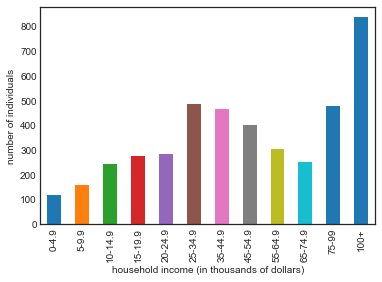

In [16]:
df['INCOME'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(12),income_labels)
plt.xlabel("household income (in thousands of dollars)")
plt.ylabel("number of individuals")

The above visualization provides an important insight into the distribution of income in this dataset: a majority of the individuals surveyed belong to the 100k+ income bracket.

### INCOME_RATIO: Ratio of family income to poverty

The poverty threshold is calculated according to the Department of Health and Human Services and adjusted to account for differences that arise from geographical location and family / household sizes. 

The ratio of family income to poverty is thus defined as: <br>

$$\text{Ratio of family income to poverty} = \frac{\text{family income}}{\text{poverty threshold}}$$

The values in INCOME_RATIO range from $0$ to $4.99$ with all values $\ge 5$ denoted $5$. For instance, an income to poverty ratio value of $0.5$ indicates that the income is $50$% below the poverty threshold, an income to poverty ratio of $1$ indicates that income is equal to poverty threshold, and an income to poverty ratio of $5$ indicates that the income is $5$ times the poverty threshold.

Text(0, 0.5, 'number of individuals')

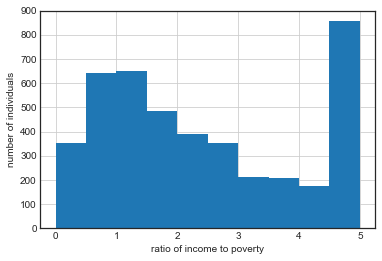

In [17]:
df['INCOME_RATIO'].hist()
plt.xlabel("ratio of income to poverty")
plt.ylabel("number of individuals")

In [18]:
df[['INCOME','INCOME_RATIO']].corr()

,INCOME,INCOME_RATIO
INCOME,1.000000,0.876722
INCOME_RATIO,0.876722,1.000000


In [19]:
## EDUCATION_ADULT (TBD)

In [20]:
## EDUCATION_KID (TBD)

To better understand marijuana usage, we will explore the following components that provide insight into consumption patterns: <br>

1. AGE_REGULAR_USE: Age started regularly using marijuana
2. AMOUNT: Number of joints/pipes per day
3. FREQUENCY: Number of times / month

### AGE_REGULAR_USE: Age started regularly using marijuana

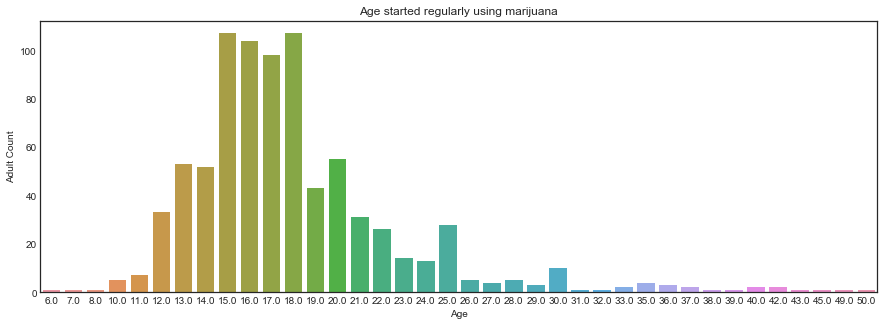

In [21]:
sns.countplot(x='AGE_REGULAR_USE', data=df)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Age started regularly using marijuana')
ax.set_ylabel('Adult Count')
ax.set_xlabel('Age')

fig = plt.gcf()
fig.set_size_inches(15,5)


### AMOUNT: Number of joints / pipes per day

Text(0, 0.5, 'number of individuals')

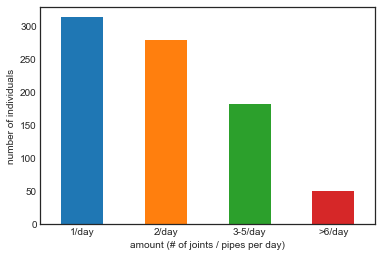

In [22]:
# remove unknown, missing, and cummulative values
df.drop(df[(df['AMOUNT']==7777) | (df['AMOUNT']==9999)].index, inplace=True)
df['AMOUNT'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(4),amount_labels, rotation='horizontal')
plt.xlabel("amount (# of joints / pipes per day)")
plt.ylabel("number of individuals")


In [23]:
## FREQUENCY (TBD)
df.drop(df[(df['FREQUENCY']==7777) | (df['FREQUENCY']==9999)].index, inplace=True)

# Exploratory Analysis

In [24]:
## ADULT EDUCATION V. AGE_REGULAR_USE (TBD)

In [25]:
## TTEST: EDUCATION V. AGE_REGULAR_USE (TBD)

### Subsetting data
We hypothesize that younger people (operationally defined as below the age of 26) would demonstrate a a higher rate of marijuana usage because of the social popularity and culture behind this drug amongst the youth. Going forward, we will analyze marjiuana consumption patterns in this particular age group.

In [26]:
min_age = df['AGE'].min()
max_age = df['AGE'].max()
min_age, max_age

(18.0, 69.0)

In [27]:
df_26 = df[df['AGE'] <= 26]
df_26.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0
6,83743.0,1.0,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14,83759.0,2.0,19.0,15.0,NaN,NaN,NaN,7.0,1.74,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15,83761.0,2.0,24.0,NaN,5.0,5.0,2.0,1.0,0.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23,83784.0,1.0,22.0,NaN,4.0,5.0,NaN,NaN,NaN,4.0,...,1.0,12.0,5.0,1.0,13.0,0.0,4.0,1.0,27.0,0.0


### Household Income and age of regular use

Text(0.5, 1.0, 'Household Income and Age started using marijuana regularly (aged 26 or younger)')

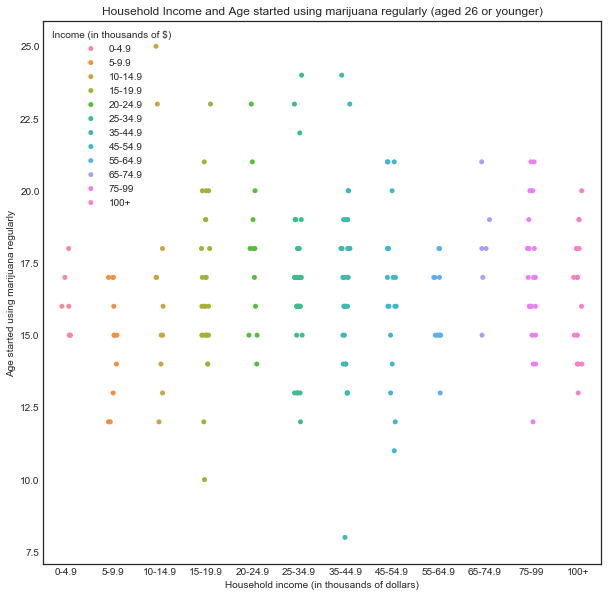

In [52]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='AGE_REGULAR_USE', data=df_26)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Age started using marijuana regularly")
plt.legend(income_labels, title='Income (in thousands of $)', loc='best')
plt.title("Household Income and Age started using marijuana regularly (aged 26 or younger)")

In [62]:
outcome, predictors = patsy.dmatrices('AGE_REGULAR_USE~INCOME', df_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        AGE_REGULAR_USE   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8696
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.352
Time:                        17:06:22   Log-Likelihood:                -506.83
No. Observations:                 212   AIC:                             1018.
Df Residuals:                     210   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.4066      0.384     42.734      0.0

### Household income and amount consumed per day

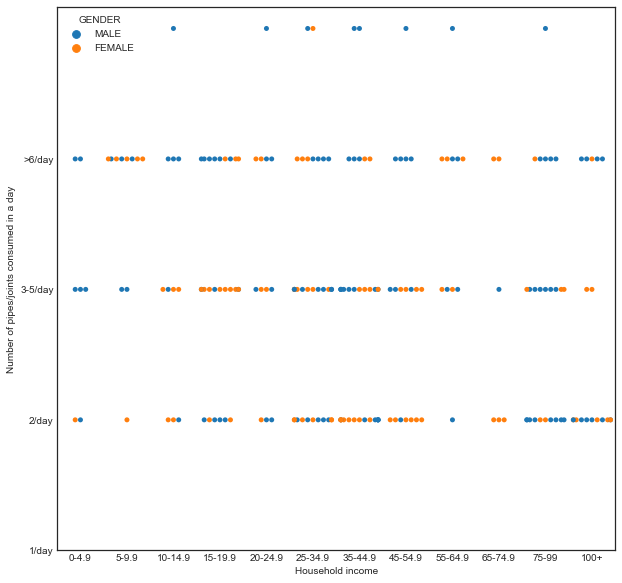

In [53]:
plt.figure(figsize=(10,10))
sns.swarmplot(df_26['INCOME'], df_26['AMOUNT'], data=df_26, hue='GENDER')
plt.xlabel("Household income")
plt.ylabel("Number of pipes/joints consumed in a day")
plt.xticks(np.arange(12), income_labels)
plt.yticks(np.arange(4), amount_labels)
plt.show()

In [63]:
outcome, predictors = patsy.dmatrices('AMOUNT~INCOME', df_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AMOUNT   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.422
Date:                Mon, 10 Jun 2019   Prob (F-statistic):             0.0208
Time:                        17:06:34   Log-Likelihood:                -273.41
No. Observations:                 212   AIC:                             550.8
Df Residuals:                     210   BIC:                             557.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2805      0.128     17.863      0.0

### Household income and frequency of consumption

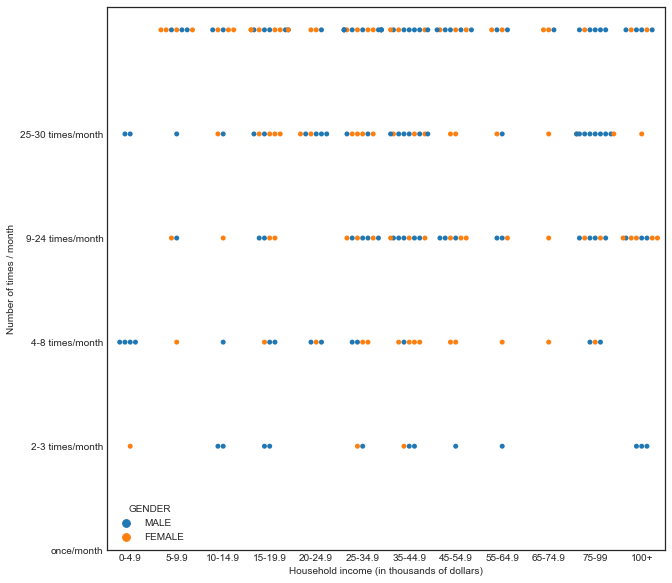

In [51]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='INCOME', y='FREQUENCY', data=df_26, hue='GENDER')
plt.xticks(np.arange(12),income_labels)
plt.yticks(np.arange(5), frequency_labels)
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Number of times / month")
plt.show()

In [64]:
outcome, predictors = patsy.dmatrices('FREQUENCY~INCOME', df_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02552
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.873
Time:                        17:06:50   Log-Likelihood:                -351.97
No. Observations:                 212   AIC:                             707.9
Df Residuals:                     210   BIC:                             714.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6864      0.185     19.933      0.0

We will now perform a multivariate OLS regression to explore how marijuana consumption trends correlate with income and education levels

## How do income and education correlate with Marijuana consumption patterns?

### Multivariate Regression: Household income and adult education vs. age when started using regularly

In [65]:
outcome, predictors = patsy.dmatrices('AGE_REGULAR_USE~INCOME+EDUCATION_ADULT', df_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        AGE_REGULAR_USE   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     19.37
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           3.07e-08
Time:                        17:07:12   Log-Likelihood:                -364.00
No. Observations:                 159   AIC:                             734.0
Df Residuals:                     156   BIC:                             743.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.3346      0.753     

### Multivariate Regression: Household income and adult education vs. amount consumed per day

In [72]:
outcome, predictors = patsy.dmatrices('AMOUNT~INCOME+EDUCATION_ADULT', df_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AMOUNT   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     6.109
Date:                Mon, 10 Jun 2019   Prob (F-statistic):            0.00279
Time:                        17:13:09   Log-Likelihood:                -201.06
No. Observations:                 159   AIC:                             408.1
Df Residuals:                     156   BIC:                             417.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.8890      0.270     

### Multivariate Regression: Household income and adult education vs. frequency of consumption

In [71]:
outcome, predictors = patsy.dmatrices('FREQUENCY~INCOME+EDUCATION_ADULT', df_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2935
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.746
Time:                        17:12:16   Log-Likelihood:                -258.50
No. Observations:                 159   AIC:                             523.0
Df Residuals:                     156   BIC:                             532.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.9230      0.388     

## Digging Deeper: How do age and gender correlate with marijuana consumption?

TBD

### Multivariate Regression:  age and gender vs. age when started using regularly

In [78]:
outcome, predictors = patsy.dmatrices('AGE_REGULAR_USE~AGE+GENDER', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        AGE_REGULAR_USE   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     29.12
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           6.02e-13
Time:                        17:19:34   Log-Likelihood:                -2500.2
No. Observations:                 827   AIC:                             5006.
Df Residuals:                     824   BIC:                             5021.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5703      0.739     17.007      0.0

### Multivariate Regression:  age and gender vs. amount consumed in a day

In [80]:
outcome, predictors = patsy.dmatrices('FREQUENCY~AGE+GENDER', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.586
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.205
Time:                        17:20:04   Log-Likelihood:                -6205.2
No. Observations:                 827   AIC:                         1.242e+04
Df Residuals:                     824   BIC:                         1.243e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.8978     65.223     -1.087      0.2

### Multivariate Regression:  age and gender vs. frequency of consumption

In [81]:
outcome, predictors = patsy.dmatrices('FREQUENCY~AGE+GENDER', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.586
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.205
Time:                        17:21:58   Log-Likelihood:                -6205.2
No. Observations:                 827   AIC:                         1.242e+04
Df Residuals:                     824   BIC:                         1.243e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.8978     65.223     -1.087      0.2

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*